In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib

# Import API key
from api_keys import api_keys

# Incorporated citipy to determine city based on latitude and longitude
!pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [16]:
rand_latlong= []
cities = []

# random numpy array of 1,500 lat-long combo
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# zip object in order to iterate two variables together
rand_latlong= zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for LatLong in rand_latlong:
    city = citipy.nearest_city(LatLong[0], LatLong[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)
if city_count >=500:
    print(str(city_count) + " cities: sufficient")
else:
        print(str(city_count) + " cities not sufficient")


591 cities: sufficient


Perform API calls

In [19]:

# OpenWeatherMap API Key
api_key = api_keys
# gathering URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# to store city data
city_data = []

# Print to logger
print("---Loading Data for---(%s)" % time.strftime("%x"))
print("----------------------------------")

# Create counters
record_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    print("Processing Record %s of %s | %s" % (record_count, city_count, city))
    print(city_url)
    record_count += 1
    try:
        # Parse the JSON and retrieve data
        openweather= requests.get(city_url).json()
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": openweather["coord"]["lat"], 
                          "Lng": openweather["coord"]["lon"],
                          "Max Temp": openweather["main"]["temp_max"],
                          "Humidity": openweather["main"]["humidity"],
                          "Cloudiness": openweather["clouds"]["all"],
                          "Wind Speed": openweather["wind"]["speed"],
                          "Country": openweather["sys"]["country"],
                          "Date": openweather["dt"]})

    # If an error is experienced, skip the city
    except:
        print("No data found for requested city...\nSkipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("---Data Retrieval Complete---")
print("-----------------------------")

---Loading Data for---(01/31/19)
----------------------------------
Processing Record 1 of 591 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=bambous%20virieux
Processing Record 2 of 591 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=castro
Processing Record 3 of 591 | arkhangelsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=arkhangelsk
Processing Record 4 of 591 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=hermanus
Processing Record 5 of 591 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=barrow
Processing Record 6 of 591 | kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=kodiak
Processing Record 7 of

Processing Record 54 of 591 | labutta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=labutta
No data found for requested city...
Skipping...
Processing Record 55 of 591 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=yellowknife
Processing Record 56 of 591 | nioro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=nioro
Processing Record 57 of 591 | te anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=te%20anau
Processing Record 58 of 591 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=hilo
Processing Record 59 of 591 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=provideniya
Processing Record 60 of 591 | anchorage
http://api

Processing Record 107 of 591 | goma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=goma
Processing Record 108 of 591 | half moon bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=half%20moon%20bay
Processing Record 109 of 591 | marcona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=marcona
No data found for requested city...
Skipping...
Processing Record 110 of 591 | eureka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=eureka
Processing Record 111 of 591 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=cabo%20san%20lucas
Processing Record 112 of 591 | havoysund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=havoysund
Processing Record 113 

Processing Record 159 of 591 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=leningradskiy
Processing Record 160 of 591 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=saint-augustin
Processing Record 161 of 591 | grajau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=grajau
No data found for requested city...
Skipping...
Processing Record 162 of 591 | hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=hamilton
Processing Record 163 of 591 | tres arroyos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=tres%20arroyos
Processing Record 164 of 591 | eregli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=eregli
Processing Recor

Processing Record 212 of 591 | saint anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=saint%20anthony
Processing Record 213 of 591 | kazalinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=kazalinsk
No data found for requested city...
Skipping...
Processing Record 214 of 591 | avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=avarua
Processing Record 215 of 591 | namatanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=namatanai
Processing Record 216 of 591 | vilyuysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=vilyuysk
Processing Record 217 of 591 | kutahya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=kutahya
Processing Record 218 of 591 |

Processing Record 264 of 591 | vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=vao
Processing Record 265 of 591 | muli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=muli
Processing Record 266 of 591 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=qaqortoq
Processing Record 267 of 591 | port blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=port%20blair
Processing Record 268 of 591 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=norman%20wells
Processing Record 269 of 591 | nara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=nara
Processing Record 270 of 591 | awbari
http://api.openweathermap.org/data/2.5/weather?units=Imperia

Processing Record 317 of 591 | camana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=camana
No data found for requested city...
Skipping...
Processing Record 318 of 591 | el wasta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=el%20wasta
No data found for requested city...
Skipping...
Processing Record 319 of 591 | mayna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=mayna
Processing Record 320 of 591 | baruun-urt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=baruun-urt
Processing Record 321 of 591 | upata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=upata
Processing Record 322 of 591 | firovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=firovo
Proces

Processing Record 368 of 591 | la ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=la%20ronge
Processing Record 369 of 591 | argentan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=argentan
Processing Record 370 of 591 | leh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=leh
Processing Record 371 of 591 | lusambo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=lusambo
Processing Record 372 of 591 | novopokrovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=novopokrovka
Processing Record 373 of 591 | esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=esperance
Processing Record 374 of 591 | torbay
http://api.openweathermap.org/data/2.5/weather?uni

Processing Record 421 of 591 | kaliua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=kaliua
Processing Record 422 of 591 | nueva loja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=nueva%20loja
Processing Record 423 of 591 | curup
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=curup
Processing Record 424 of 591 | ngunguru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=ngunguru
Processing Record 425 of 591 | boke
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=boke
Processing Record 426 of 591 | zyryanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=zyryanka
Processing Record 427 of 591 | moravsky beroun
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record 474 of 591 | vrangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=vrangel
Processing Record 475 of 591 | tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=tura
Processing Record 476 of 591 | aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=aykhal
Processing Record 477 of 591 | toucheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=toucheng
Processing Record 478 of 591 | elat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=elat
Processing Record 479 of 591 | tateyama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=tateyama
Processing Record 480 of 591 | bolungarvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

Processing Record 526 of 591 | paramonga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=paramonga
Processing Record 527 of 591 | saint pete beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=saint%20pete%20beach
Processing Record 528 of 591 | gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=gat
Processing Record 529 of 591 | iquique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=iquique
Processing Record 530 of 591 | lanzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=lanzhou
Processing Record 531 of 591 | biltine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=biltine
Processing Record 532 of 591 | gangapur
http://api.openweathermap.org/data/2.5/wea

Processing Record 578 of 591 | zabol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=zabol
Processing Record 579 of 591 | rosetta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=rosetta
Processing Record 580 of 591 | gizo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=gizo
Processing Record 581 of 591 | launceston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=launceston
Processing Record 582 of 591 | griffith
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=griffith
Processing Record 583 of 591 | yumen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3530ea0e2643abd07e536b63da83619a&q=yumen
Processing Record 584 of 591 | vysokogornyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

In [21]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)
# Export the City_Data into a csv
city_data_pd.to_csv(api_keys, index_label="City_ID")
# unique cities for city record count
record_count = len(city_data_pd['City'].unique())
print("Number of records found: %s (unique cities)" %(record_count))

Number of records found: 534 (unique cities)


In [22]:
# # objective is to build a series of scatter plots to showcase the following relationships:
lat_axis = city_data_pd['Lat']
# # Temperature (F) vs. Latitude
# # Humidity (%) vs. Latitude
# # Cloudiness (%) vs. Latitude
# # Wind Speed (mph) vs. Latitude

Max Temp vs Lat. plotting...


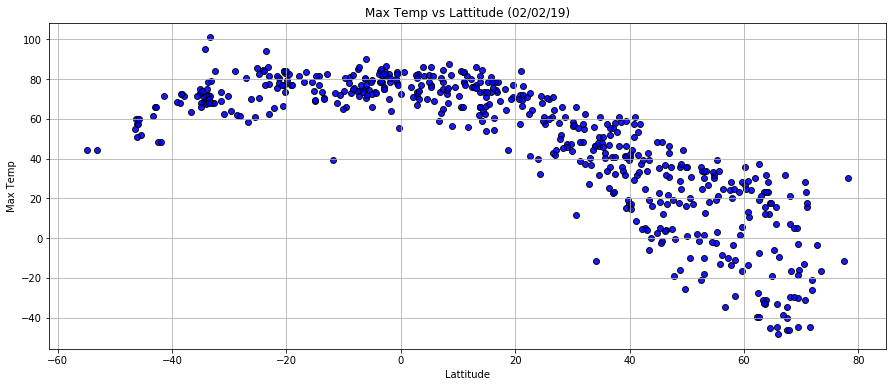

             *Max Temp vs Lat. saved as ...api_keysMax Temp.png


Humidity vs Lat. plotting...


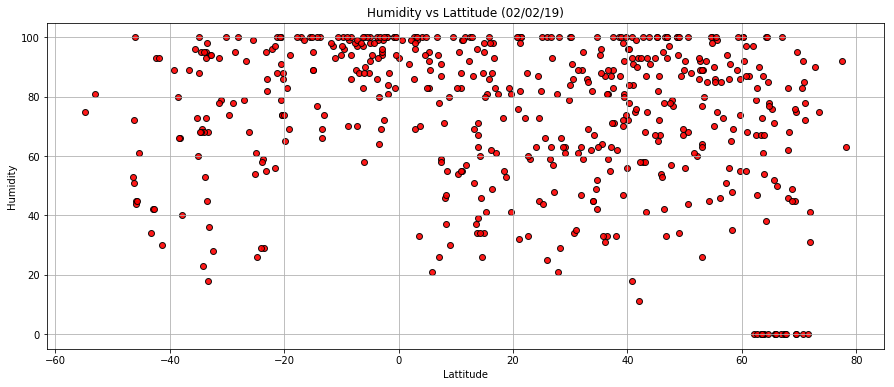

             *Humidity vs Lat. saved as ...api_keysHumidity.png


Cloudiness vs Lat. plotting...


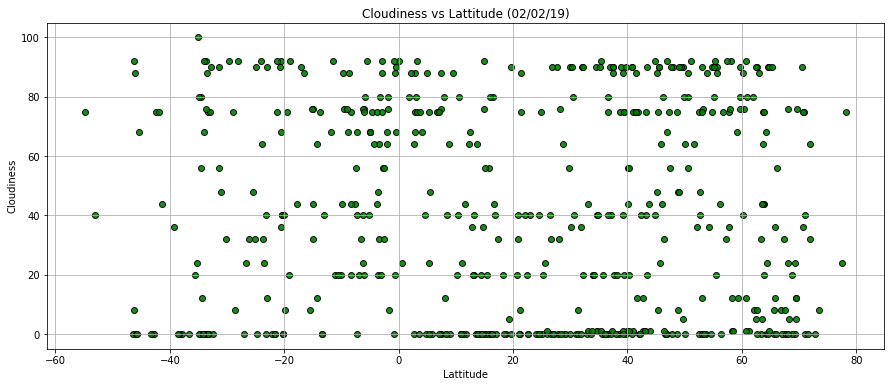

             *Cloudiness vs Lat. saved as ...api_keysCloudiness.png


Wind Speed vs Lat. plotting...


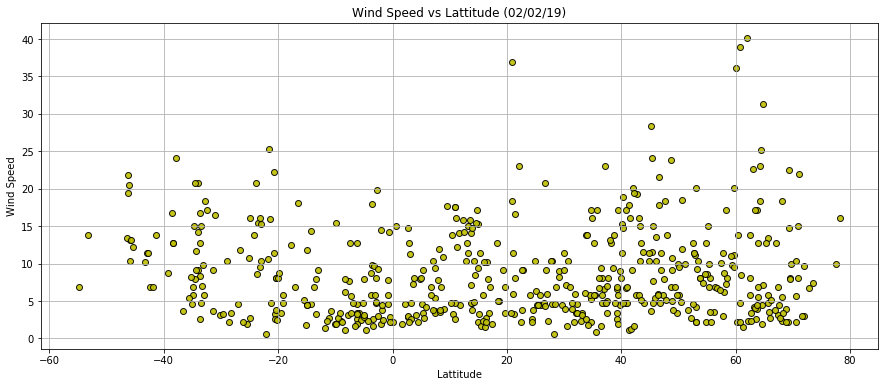

             *Wind Speed vs Lat. saved as ...api_keysWind Speed.png




In [24]:
# keep lat_axis fixed for every iteration and iterate through all other axis arrays
ax_list = ['Max Temp','Humidity', 'Cloudiness', 'Wind Speed']
# create an array for different colors on each plot
color_list = ['b', 'r' , 'g' , 'y']
# scatter plots with todays date, then save on output_data output_data folder and print messages along 
for axis in ax_list:
        plt.figure(figsize=(15,6))
        plt.title(axis + " vs Lattitude (%s)" % time.strftime("%x"))
        print(axis + " vs Lat. plotting...")
        plt.scatter(lat_axis, city_data_pd[axis], marker="o", facecolors= color_list[ax_list.index(axis)], edgecolors="black", alpha=0.90)
        plt.xlabel('Lattitude')
        plt.ylabel(axis)
        plt.grid()
        plt.savefig('api_keys'+axis)
        plt.show()
        print("             *" + axis + " vs Lat. saved as ..."+'api_keys'+axis+".png")
        print("\n")

Three observable trends:

    1) The closer the city is to the equator, the more humidity is present.
    
    2) Cloudiness is a characteristic that can be present in any city regardless of location or proximity to equator line. 
    
    3) According to the data, wind travels outward from the equator to the North and South poles. 